# Diabetes Prediction

Objective: To develop diabetes prediction model
Data Set story
* This data set is taken from the diabetes and kidney diseases institute.
* The aim is to predict whether or not a patient has diabetes, based on specific diagnostic measures.
* With this example, it has been selected from a larger database for various restrictions.
* In particular, all patients here are women of pima indian lineage who are at least 21 years old.

Variables:
* Pregnacies: Number of pregnancy
* Glucose: 2 hour plasma glucose concentration in oral glucose test
* BloodPressure: Blood pressure (small blood pressure)
* SkinThickness: Skin thickness
* Insulin: 2-hour serum insulin
* BMBody: Body mass index
* DiabetsPedigreeFunction: Diabets Pedigree function
* Age: Age
* Outcome: With disease (1) or not (0)

In [1]:
!pip install lightgbm

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

# LOGISTIC REGRESSION

# Data Understanding

In [4]:
df = pd.read_csv("../input/diabet/diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# From the infos of the dataset, I am accessing the informations regarding the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape

(768, 9)

# Are there any contradictory observations?

In [9]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


# I am looking at the unbalanced data / class distribution.

In [10]:
df['Outcome'].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

# I visualize with graphics.

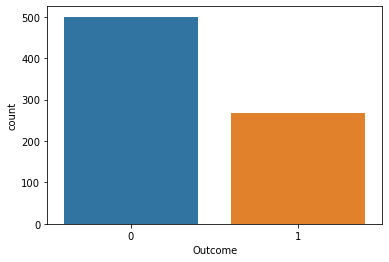

In [11]:
sns.countplot(x = 'Outcome', data = df)

# I look at the correlation coefficients. I want to see what relationship exists between the variables.

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# # Data Preprocessing

I am getting missing observation information.

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# I look at contradictory observations.

In [14]:
for feature in df:
        
        Q1 = df[feature].quantile(0.05)
        Q3 = df[feature].quantile(0.95)
        IQR = Q3-Q1
        lower = Q1- 1.5*IQR
        upper = Q3 + 1.5*IQR
        
        if df[(df[feature] > upper)].any(axis=None):
            print(feature,"yes")
        else:
            print(feature, "no")
        

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin yes
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


I reach the contrary value of Insulin.

In [15]:
Q1 = df["Insulin"].quantile(0.05)
Q3 = df["Insulin"].quantile(0.95)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR

In [16]:
upper

732.5

In [17]:
df[df["Insulin"] > upper]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0


In [18]:
df.loc[df["Insulin"] > upper, "Insulin"] = upper

# MODELLING

We separate dependent variables and independent variables

In [20]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0.0,33.6,0.627,50
1,1,85,66,29,0.0,26.6,0.351,31
2,8,183,64,0,0.0,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# I fit the data using all the data, I set up the model.

In [23]:
log_model = LogisticRegression().fit(X,y)

# Since it is a linear regression, we bring the constant.

In [24]:
log_model.intercept_

array([-8.72682867])

We bring the coefficients.

In [25]:
log_model.coef_

array([[ 0.12969241,  0.03548576, -0.01186781, -0.00447309, -0.00122999,
         0.10029957,  1.036912  ,  0.0113688 ]])

I am predicting.

In [26]:
log_model.predict

<bound method LinearClassifierMixin.predict of LogisticRegression()>

I look at the estimated values of the top 10.

In [27]:
log_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

The probabilistic values of the estimated values are actually as follows.

In [28]:
log_model.predict_proba(X)

array([[0.29300619, 0.70699381],
       [0.95728224, 0.04271776],
       [0.19113494, 0.80886506],
       ...,
       [0.83980198, 0.16019802],
       [0.71560519, 0.28439481],
       [0.93271459, 0.06728541]])

# We keep the predicted values.

In [29]:
y_pred = log_model.predict(X)

# Classification prediction score of the model.

In [30]:
accuracy_score(y, y_pred)

0.7838541666666666

When there are many variables, the following values should be checked instead of accuracy_score.

In [31]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.59      0.66       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



We look at the AUC value.

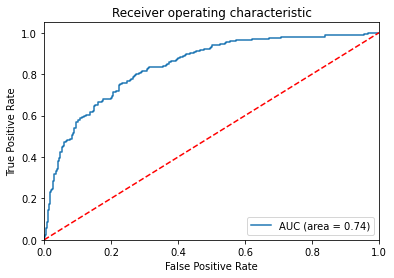

In [32]:
logit_roc_auc = roc_auc_score(y, log_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# I rebuild my model through cross validation.

In [33]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
log_model = LogisticRegression().fit(X,y)
y_pred = log_model.predict(X)
accuracy_score(y, y_pred)

0.7838541666666666

When we do 10-fold verification with CV, the result is:

In [34]:
cross_val_score(log_model, X, y, cv = 10).mean()

0.7708133971291866

# Random Forests

We fitted the model

In [35]:
rf_model = RandomForestClassifier(random_state = 12345).fit(X,y)

with the 10-fold cv,  cross validation score found

In [36]:
cross_val_score(rf_model, X, y, cv = 10).mean()

0.7643028024606972

Model parameters were examined.

In [37]:
rf_model

RandomForestClassifier(random_state=12345)

In [38]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [39]:
rf_model = RandomForestClassifier(random_state = 12345)

In [40]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 16.4min finished


In [41]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 100}

In [42]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [43]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.7656185919343814

# LightGBM

In [44]:
lgbm = LGBMClassifier(random_state = 12345)

In [45]:
cross_val_score(lgbm, X, y, cv = 10).mean()

0.7343984962406016

In [46]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

In [47]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 5, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   32.1s finished


In [48]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

In [49]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

0.7591592617908407

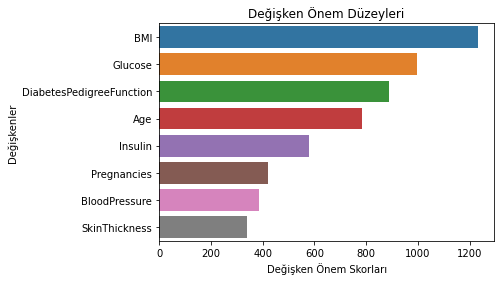

In [50]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

LR: 0.770386 (0.058873)
KNN: 0.728213 (0.052930)
CART: 0.711793 (0.026428)
RF: 0.777049 (0.043326)
SVM: 0.650132 (0.081100)
XGB: 0.770465 (0.044746)
LightGBM: 0.749260 (0.045988)


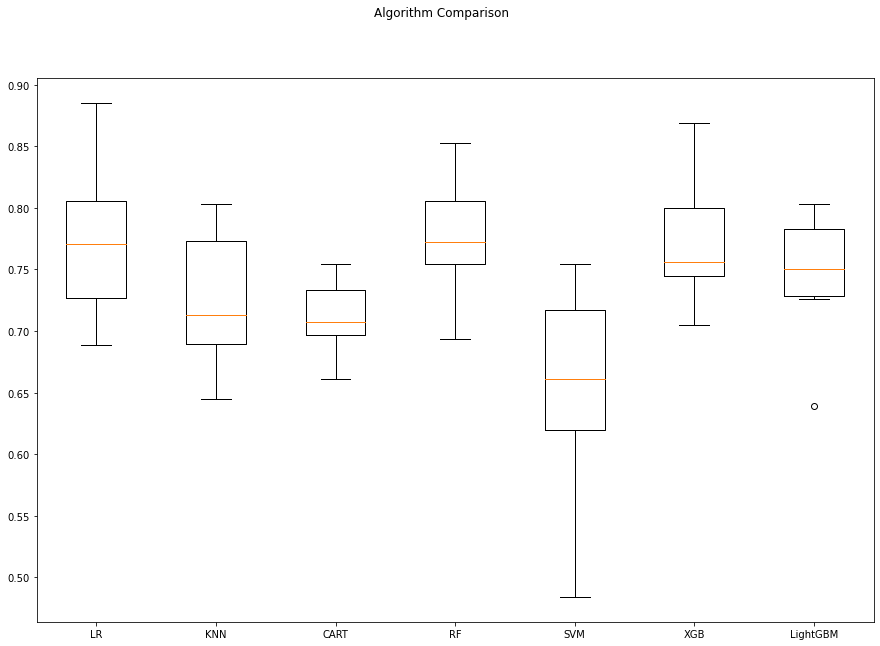

In [51]:
# Tum modellerin train validasyon skorları

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 46)



# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 123456)
        cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [52]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, acc)
        print(msg)

LR: (0.766234)
KNN: (0.707792)
CART: (0.668831)
RF: (0.746753)
SVM: (0.655844)
XGB: (0.753247)
LightGBM: (0.688312)


# Reporting CRISP-DM Path
Understanding the Data: Operations were carried out to understand the data with basic functions.
Data Pre-Processing: It was determined that there are no missing values. 2 outliers were detected, and these 2 outliers were equal to the highest threshold.
Results of Base Models: The best result was found to be logistic regression with 0.77.